In [36]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn import preprocessing
%matplotlib inline
#Load the relevant dataset
df = pd.read_csv('NFL Play by Play 2009-2018 (v5).csv')

c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (42,166,167,168,169,174,175,178,179,182,183,188,189,190,191,194,195,203,204,205,218,219,220,231,232,233,238,240,241,249) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [37]:
#printing shape of dataframe
df.shape
print(df)

        play_id     game_id home_team away_team posteam posteam_type defteam  \
0            46  2009091000       PIT       TEN     PIT         home     TEN   
1            68  2009091000       PIT       TEN     PIT         home     TEN   
2            92  2009091000       PIT       TEN     PIT         home     TEN   
3           113  2009091000       PIT       TEN     PIT         home     TEN   
4           139  2009091000       PIT       TEN     PIT         home     TEN   
5           162  2009091000       PIT       TEN     TEN         away     PIT   
6           183  2009091000       PIT       TEN     TEN         away     PIT   
7           207  2009091000       PIT       TEN     TEN         away     PIT   
8           228  2009091000       PIT       TEN     TEN         away     PIT   
9           253  2009091000       PIT       TEN     PIT         home     TEN   
10          277  2009091000       PIT       TEN     PIT         home     TEN   
11          301  2009091000       PIT   

In [38]:
#Select Team(s) of intererst and filter rows
gbdf = df[(df.posteam=='GB') & (df.down.isin([1.0, 2.0, 3.0, 4.0])) & ((df.play_type=='run') | (df.play_type == 'pass'))]
#filter columns possibly related to playtype
gbdf = gbdf[['game_seconds_remaining', 'yardline_100', 'down', 'ydstogo', 'shotgun', 'score_differential', 'play_type', 'pass_length', 'pass_location', 'run_location']]
gbdf.head()

,game_seconds_remaining,yardline_100,down,ydstogo,shotgun,score_differential,play_type,pass_length,pass_location,run_location
2221,3590.0,51.0,1.0,10,0,0.0,pass,short,middle,NaN
2222,3558.0,45.0,2.0,4,0,0.0,run,NaN,NaN,middle
2223,3520.0,46.0,3.0,5,1,0.0,pass,short,middle,NaN
2224,3484.0,33.0,1.0,10,0,0.0,run,NaN,NaN,right
2225,3447.0,32.0,2.0,9,0,0.0,run,NaN,NaN,left


In [39]:
import numpy as np
def get_full_play_type(play):
    play_type, pass_location, run_location = play
    if(play_type == 'run'):
        return play_type+'_'+ run_location
    else:
        return play_type+'_'+ pass_location
gbdf = gbdf.replace(np.nan, 'unknown', regex=True)    
gbdf['full_play_type'] = gbdf[['play_type','pass_location', 'run_location']].apply(get_full_play_type, axis=1)
gbdf = gbdf[(gbdf.full_play_type.isin(['pass_left', 'pass_middle','pass_right','run_left', 'run_middle', 'run_right']))]

In [40]:
gbdf.head()

,game_seconds_remaining,yardline_100,down,ydstogo,shotgun,score_differential,play_type,pass_length,pass_location,run_location,full_play_type
2221,3590.0,51.0,1.0,10,0,0.0,pass,short,middle,unknown,pass_middle
2222,3558.0,45.0,2.0,4,0,0.0,run,unknown,unknown,middle,run_middle
2223,3520.0,46.0,3.0,5,1,0.0,pass,short,middle,unknown,pass_middle
2224,3484.0,33.0,1.0,10,0,0.0,run,unknown,unknown,right,run_right
2225,3447.0,32.0,2.0,9,0,0.0,run,unknown,unknown,left,run_left


In [41]:
gbdf.groupby(['full_play_type']).count()[['play_type']]

,play_type
full_play_type,
pass_left,1939
pass_middle,1231
pass_right,2400
run_left,1594
run_middle,786
run_right,1543


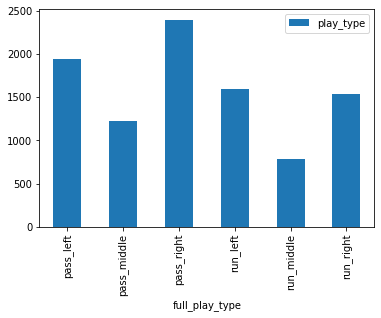

In [42]:
gbdf.groupby(['full_play_type']).count()[['play_type']].plot(kind='bar')

In [43]:
gbdf.groupby(['full_play_type']).count()[['play_type']].apply(lambda x:100*x/float(x.sum()))

,play_type
full_play_type,
pass_left,20.425577
pass_middle,12.967450
pass_right,25.281787
run_left,16.791320
run_middle,8.279785
run_right,16.254082


In [44]:
le = preprocessing.LabelEncoder()
le.fit(gbdf.full_play_type)
gbdf['full_play_type'] = le.transform(gbdf['full_play_type'])

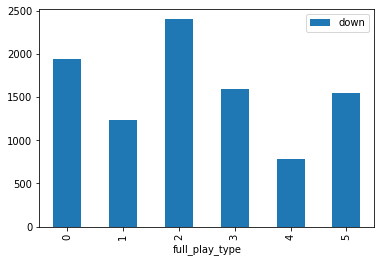

In [45]:
gbdf.groupby(['full_play_type']).count()[['down']].plot(kind='bar')

In [46]:
def bucketsize(val, size, count):
    i=0
    for i in range(count):
        if val <=(i+1)*size:
            return i
    return i
    
def bucketsize_df(df):
    df['ydstogo'] = [bucketsize(x,4,5) for x in df['ydstogo']]
    return df

gbdf = bucketsize_df(gbdf)



In [47]:
gbdf= pd.concat([gbdf, pd.get_dummies(gbdf['down'], prefix='down')],axis=1)
gbdf = pd.concat([gbdf, pd.get_dummies(gbdf['ydstogo'], prefix='ydstogo')], axis=1)

In [48]:
gbdf.head()

,game_seconds_remaining,yardline_100,down,ydstogo,shotgun,score_differential,play_type,pass_length,pass_location,run_location,full_play_type,down_1.0,down_2.0,down_3.0,down_4.0,ydstogo_0,ydstogo_1,ydstogo_2,ydstogo_3,ydstogo_4
2221,3590.0,51.0,1.0,2,0,0.0,pass,short,middle,unknown,1,1,0,0,0,0,0,1,0,0
2222,3558.0,45.0,2.0,0,0,0.0,run,unknown,unknown,middle,4,0,1,0,0,1,0,0,0,0
2223,3520.0,46.0,3.0,1,1,0.0,pass,short,middle,unknown,1,0,0,1,0,0,1,0,0,0
2224,3484.0,33.0,1.0,2,0,0.0,run,unknown,unknown,right,5,1,0,0,0,0,0,1,0,0
2225,3447.0,32.0,2.0,2,0,0.0,run,unknown,unknown,left,3,0,1,0,0,0,0,1,0,0


In [49]:
gbdf.describe()

,game_seconds_remaining,yardline_100,down,ydstogo,shotgun,score_differential,full_play_type,down_1.0,down_2.0,down_3.0,down_4.0,ydstogo_0,ydstogo_1,ydstogo_2,ydstogo_3,ydstogo_4
count,9493.000000,9493.000000,9493.000000,9493.000000,9493.000000,9493.000000,9493.000000,9493.000000,9493.000000,9493.000000,9493.000000,9493.000000,9493.000000,9493.00000,9493.000000,9493.000000
mean,1771.380491,50.965132,1.769725,1.543137,0.599810,1.266196,2.282945,0.452017,0.340672,0.192879,0.014432,0.183082,0.189929,0.55936,0.036027,0.031602
std,1039.193229,24.773061,0.806018,0.935982,0.489962,10.752024,1.681936,0.497719,0.473960,0.394580,0.119268,0.386754,0.392266,0.49649,0.186366,0.174948
min,0.000000,1.000000,1.000000,0.000000,0.000000,-31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,891.000000,32.000000,1.000000,1.000000,0.000000,-6.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,1800.000000,54.000000,2.000000,2.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,0.000000,0.000000
75%,2668.000000,72.000000,2.000000,2.000000,1.000000,7.000000,3.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.00000,0.000000,0.000000
max,3600.000000,99.000000,4.000000,4.000000,1.000000,55.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [50]:
gbdf.dtypes

game_seconds_remaining    float64
yardline_100              float64
down                      float64
ydstogo                     int64
shotgun                     int64
score_differential        float64
play_type                  object
pass_length                object
pass_location              object
run_location               object
full_play_type              int32
down_1.0                    uint8
down_2.0                    uint8
down_3.0                    uint8
down_4.0                    uint8
ydstogo_0                   uint8
ydstogo_1                   uint8
ydstogo_2                   uint8
ydstogo_3                   uint8
ydstogo_4                   uint8
dtype: object

In [51]:
df['game_seconds_remaining'].astype(float)

0         3600.0
1         3593.0
2         3556.0
3         3515.0
4         3507.0
5         3496.0
6         3460.0
7         3431.0
8         3394.0
9         3384.0
10        3348.0
11        3321.0
12        3283.0
13        3241.0
14        3205.0
15        3200.0
16        3177.0
17        3144.0
18        3117.0
19        3112.0
20        3108.0
21        3104.0
22        3069.0
23        3027.0
24        3002.0
25        2989.0
26        2967.0
27        2947.0
28        2925.0
29        2886.0
           ...  
449341     536.0
449342     531.0
449343     531.0
449344     486.0
449345     441.0
449346     403.0
449347     376.0
449348     340.0
449349     340.0
449350     299.0
449351     256.0
449352     213.0
449353     167.0
449354     150.0
449355     150.0
449356     120.0
449357     120.0
449358     115.0
449359     115.0
449360     111.0
449361     111.0
449362     104.0
449363      82.0
449364      77.0
449365      64.0
449366      63.0
449367      58.0
449368      38

In [52]:
gbdf.dtypes

game_seconds_remaining    float64
yardline_100              float64
down                      float64
ydstogo                     int64
shotgun                     int64
score_differential        float64
play_type                  object
pass_length                object
pass_location              object
run_location               object
full_play_type              int32
down_1.0                    uint8
down_2.0                    uint8
down_3.0                    uint8
down_4.0                    uint8
ydstogo_0                   uint8
ydstogo_1                   uint8
ydstogo_2                   uint8
ydstogo_3                   uint8
ydstogo_4                   uint8
dtype: object

In [53]:
gbdf['game_seconds_remaining']/= 3600

In [54]:
gbdf['yardline_100']/=100

In [55]:
gbdf['score_differential']=(gbdf['score_differential']+50)/100

In [56]:
gbdf.head()

,game_seconds_remaining,yardline_100,down,ydstogo,shotgun,score_differential,play_type,pass_length,pass_location,run_location,full_play_type,down_1.0,down_2.0,down_3.0,down_4.0,ydstogo_0,ydstogo_1,ydstogo_2,ydstogo_3,ydstogo_4
2221,0.997222,0.51,1.0,2,0,0.5,pass,short,middle,unknown,1,1,0,0,0,0,0,1,0,0
2222,0.988333,0.45,2.0,0,0,0.5,run,unknown,unknown,middle,4,0,1,0,0,1,0,0,0,0
2223,0.977778,0.46,3.0,1,1,0.5,pass,short,middle,unknown,1,0,0,1,0,0,1,0,0,0
2224,0.967778,0.33,1.0,2,0,0.5,run,unknown,unknown,right,5,1,0,0,0,0,0,1,0,0
2225,0.957500,0.32,2.0,2,0,0.5,run,unknown,unknown,left,3,0,1,0,0,0,0,1,0,0


In [57]:
from sklearn.model_selection import train_test_split

#important columns for input
X=gbdf[['yardline_100','shotgun','score_differential','game_seconds_remaining','down_1.0','down_2.0', 'down_3.0', 'down_4.0','ydstogo_0']]

#select result column for output
Y=gbdf['full_play_type']

#split data for train and test
train_x, test_x, train_y, test_y = train_test_split(X,Y,random_state=0)

In [58]:
#Train model with RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
the_clf=RandomForestClassifier(max_depth=8, n_estimators=64)
the_clf.fit(train_x,train_y)

pred= the_clf.predict(test_x)
acc= accuracy_score(test_y,pred)
print(acc)

0.2860151642796967


In [59]:
#Train model with GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
gbc = GradientBoostingClassifier()
gbc.fit(train_x, train_y)

gbc_predictions = gbc.predict(test_x)

acc= accuracy_score(test_y,gbc_predictions)
print(acc)

0.2780117944397641


In [60]:
#Train model with Gaussian Naive Bayes

from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(train_x, train_y)

gnb_predictions = gnb.predict(test_x)

acc= accuracy_score(test_y,gnb_predictions)
print(acc)

0.2910699241786015


In [61]:
#Train model with KNeighborsClassifiers
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(train_x, train_y)

knn_predictions = knn.predict(test_x)

acc= accuracy_score(test_y,knn_predictions)
print(acc)

0.2552653748946925


In [2]:
# Model with the highest accuracy is the Gaussian Naive Bayes